# Final Project：exporatory data analysis of word ratings

Name: Xiaoqi Yan  
Student number: r0866321

Affective Ratings database and concreteness database are the main databases analyzed here, the age of aquisition database is imported as well when the specific question needs. The research contains the content below.

##### Table of content  
###### Analysis of Affective Ratings database
1. Distribution of affective ratings
2. Correlation between valence, arousal, dominance and age of acquisition
3. Ratings of words denoting academic disciplines
4. Gender difference with ratings of words denoting academic disciplines

###### Analysis of Concreteness database
1. Distribution of concreteness rating 
2. Compare the difference of average concreteness rating of bigram and unigram
3. Compare the concreteness rating difference of "Adjective ","Adverb","Noun","Verb"
4. Correlation between concreteness rating and its standard deviation
5. Relation of concreteness and age of acquisition

In [3]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

## Analysis of Affective Ratings database

### 1. Distribution of affective ratings 

In [3]:
df_a = pd.read_csv(r'.\python project\Ratings_Warriner_et_al.csv')
df_a.head()

,Unnamed: 0,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
0,1,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,...,11,2.55,1.29,11,4.12,1.64,8,4.43,1.99,7
1,2,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,...,12,2.38,1.92,8,5.55,2.21,11,4.36,1.03,11
2,3,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,...,11,3.82,2.14,11,2.77,2.09,13,4.11,2.93,9
3,4,abandonment,2.63,1.74,19,4.95,2.64,21,2.64,1.81,...,14,5.29,2.63,7,2.31,1.45,16,3.08,2.19,12
4,5,abbey,5.85,1.69,20,2.20,1.70,20,5.00,2.02,...,9,2.55,1.92,11,4.83,2.18,18,5.43,1.62,7


In [22]:
#define a new funcation to reduce writting of the same code
def new_table(column_name):
    av = df_a[column_name].value_counts()
    av = {column_name:av.index,'Count':av.values}+=
    df_new = pd.DataFrame(av)
    df_new = df_new.sort_values(column_name)
    return df_new

In [155]:
# get three data frame with the number of each rating 
df_av = new_table('V.Mean.Sum')
df_aa = new_table('A.Mean.Sum')
df_ad = new_table('D.Mean.Sum')
df_av

,V.Mean.Sum,Count
533,1.26,1
526,1.30,1
601,1.33,1
548,1.40,1
593,1.47,1
...,...,...
528,8.36,1
477,8.37,3
567,8.47,1
568,8.48,1


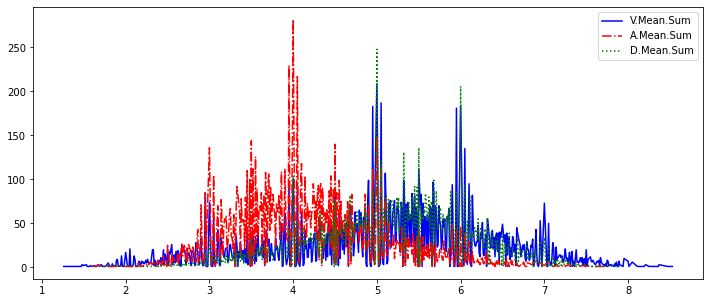

In [156]:
plt.figure(figsize = (12,5))
plt.plot(df_av['V.Mean.Sum'],df_av['Count'] , 'b-',
        df_aa['A.Mean.Sum'],df_aa['Count'] , 'r-.',
        df_ad['D.Mean.Sum'],df_ad['Count'] , 'g:')  
plt.legend(['V.Mean.Sum', 'A.Mean.Sum','D.Mean.Sum'])

  
The visualization demonstrates the distribution of affective ratings in three dimentions: valence, arousal, domiance. We can discover that in terms of valence rating, the number of the words reaches the peak when rating at around 5 and 6. In terms of arousal rating，the number of words ratings appear most densely between 3 and 5, and the most of words rate around 4. Finally, in terms of domiance, it shows a similar trend as valence rating, mainly rating between 5-6. Therefore, we can draw a conclusion that majority of words researched are relatively happy, in control, with the medium intensity of emotion.

### 2. Correlation between valence, arousal, dominance and age of acquisition 

In [52]:
#load AoA database 
df_AoA = pd.read_excel(r'.\python project\AoA\AoA_ratings_Kuperman_et_al_BRM.xlsx')

In [53]:
#in order to analyse the question, it's necessary to merge AoA table into affective rating table 
df_aAoA = pd.merge(df_a,df_AoA, on ='Word', how ='inner')
df_aAoA.rename(columns = {'Rating.Mean':'AoA.M'},inplace = True)
df_aAoA

,Unnamed: 0,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,...,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H,OccurTotal,OccurNum,Freq_pm,AoA.M,Rating.SD,Dunno
0,1,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,...,8,4.43,1.99,7,18,18,0.411765,9.89,3.66,1.000000
1,2,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,...,11,4.36,1.03,11,18,13,0.509804,12.23,3.54,0.722222
2,3,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,...,13,4.11,2.93,9,19,19,8.098039,8.32,2.75,1.000000
3,4,abandonment,2.63,1.74,19,4.95,2.64,21,2.64,1.81,...,16,3.08,2.19,12,22,22,0.960784,10.27,2.57,1.000000
4,5,abbey,5.85,1.69,20,2.20,1.70,20,5.00,2.02,...,18,5.43,1.62,7,21,18,3.176471,13.06,3.59,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13665,13911,zone,4.75,2.05,20,3.78,2.53,18,5.23,1.82,...,11,5.36,1.91,11,19,19,20.117647,8.79,2.55,1.000000
13666,13912,zoning,4.65,1.60,20,3.77,1.95,22,4.47,2.20,...,6,4.15,2.15,13,20,19,1.196078,11.84,2.87,0.950000
13667,13913,zoo,7.00,1.58,21,5.63,2.54,19,6.33,2.56,...,12,7.22,1.86,9,20,20,13.647059,3.75,1.12,1.000000
13668,13914,zoom,5.86,1.53,21,5.68,2.54,19,5.90,2.17,...,9,5.83,2.29,12,37,37,3.549020,8.57,3.30,1.000000


In [62]:
# define a function to form a table including age of acquisition and the average rating of each age
def new_table2(column_name):
    aAoA_V = df_aAoA.groupby('AoA.M')[column_name].mean()
    aAoA_V = {'AoA.M':aAoA_V.index,column_name+".M":aAoA_V.values}
    df_new = pd.DataFrame(aAoA_V)
    return df_new

df_aAoA_V = new_table2('V.Mean.Sum')
df_aAoA_A = new_table2('A.Mean.Sum')
df_aAoA_D = new_table2('D.Mean.Sum')
df_aAoA_A


,AoA.M,A.Mean.Sum.M
0,1.58,3.45
1,1.89,4.29
2,2.22,4.62
3,2.28,2.83
4,2.37,3.71
...,...,...
1102,17.13,3.77
1103,17.20,3.77
1104,18.22,3.87
1105,18.52,3.64


In [59]:
# merge three tables into one by merge function
df_aAoA_VA = pd.merge(df_aAoA_V,df_aAoA_A, on = "AoA.M", how = "inner")
df_aAoA_VAD = pd.merge(df_aAoA_VA, df_aAoA_D, on = "AoA.M", how = "inner")
df_aAoA_VAD

,AoA.M,V.Mean.Sum.M,A.Mean.Sum.M,D.Mean.Sum.M
0,1.58,7.45,3.45,5.11
1,1.89,7.64,4.29,5.28
2,2.22,7.64,4.62,6.29
3,2.28,4.29,2.83,5.39
4,2.37,7.00,3.71,6.12
...,...,...,...,...
1102,17.13,4.00,3.77,4.42
1103,17.20,6.05,3.77,4.41
1104,18.22,5.74,3.87,5.16
1105,18.52,5.85,3.64,6.63


Text(0.5, 1.0, 'Correlation between \n dominance and age of aquisition')

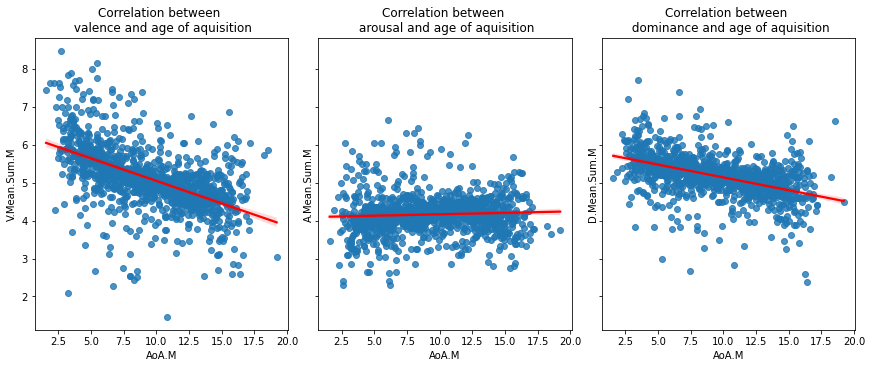

In [67]:
# using subplots to show three graphs in one raw and share the same y axis 
fig, ax =plt.subplots(1,3,constrained_layout=True, sharey=True, figsize=(12, 5))
axesSub = sns.regplot(x='AoA.M', y='V.Mean.Sum.M', data=df_aAoA_VAD,line_kws={'color': 'red'},ax=ax[0])
axesSub.set_title('Correlation between \n valence and age of aquisition')   

axesSub=sns.regplot(x='AoA.M', y='A.Mean.Sum.M', data=df_aAoA_VAD,line_kws={'color': 'red'},ax=ax[1])
axesSub.set_title('Correlation between \n arousal and age of aquisition') 

axesSub=sns.regplot(x='AoA.M', y='D.Mean.Sum.M', data=df_aAoA_VAD,line_kws={'color': 'red'},ax=ax[2])
axesSub.set_title('Correlation between \n dominance and age of aquisition')


It displays a different correlation between correlation between valence, arousal, dominance and age of acquisition. In conclusion, with the growth of age of acquisition, people feel the words learned are less happy and less in control. The arousal rating seems do not have relation with age of acquisition.

### 3. Ratings of words denoting academic disciplines


In [70]:
import nltk

In [157]:
# create a list of academic disciplines words by reading the text file prepared beforehands
# submit together in toledo or find here https://github.com/Xiaoqi961/GitHub-test/blob/main/academic%20disciplines.txt 
list_disp = []
with open(r'.\python project\academic disciplines.txt') as in_file:
    in_file = in_file.read()
    for token in nltk.word_tokenize(in_file):
        token = token.lower()
        list_disp.append(token)
# find the word including in affective table 
df_disp = df_a.loc[df_a['Word'].isin(list_disp)]
df_disp

,Unnamed: 0,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
248,249,agriculture,6.10,0.91,20,3.05,2.40,21,6.00,1.87,...,11,2.70,2.00,10,6.00,2.06,18,6.00,1.41,7
464,465,anthropology,5.30,1.87,20,2.91,2.15,23,6.00,1.81,...,13,3.00,1.83,10,6.33,1.72,12,5.50,1.93,8
558,559,archaeology,6.10,1.62,20,3.86,2.56,21,5.26,2.38,...,16,5.40,2.97,5,5.92,2.68,12,4.73,2.05,15
567,568,architecture,6.05,1.36,20,4.39,2.59,23,5.67,1.97,...,9,4.64,2.24,14,5.40,2.06,15,7.00,0.00,3
610,611,art,6.85,1.89,39,4.48,2.48,23,6.02,2.14,...,20,6.00,1.00,3,6.25,2.32,28,5.78,1.95,27
689,690,astronomy,6.00,1.81,20,4.33,2.82,21,5.21,2.41,...,10,4.73,2.83,11,5.53,2.62,17,4.43,1.72,7
1144,1145,biology,6.00,1.45,20,4.10,2.22,20,4.45,2.13,...,12,4.12,2.36,8,4.18,1.60,11,4.73,2.61,11
1634,1635,business,5.48,1.81,21,3.71,1.93,21,5.35,2.42,...,6,3.93,1.62,15,6.56,2.30,9,4.00,1.85,8
2012,2013,chemistry,5.74,1.82,19,4.59,2.42,22,5.12,2.33,...,9,4.08,2.50,13,5.12,2.50,16,5.12,2.10,8
3932,3933,economics,5.20,1.61,20,3.70,2.20,20,4.05,2.13,...,12,4.25,2.60,8,4.55,2.02,11,3.55,2.21,11


In [133]:
# define a function to help process common parts of visualization
def visualize(column_name):
    df_disp1 = df_disp.sort_values(column_name)
    x = df_disp1['Word'].tolist()
    y = df_disp1[column_name].tolist()

    txt = df_disp1['Word'].tolist()
    
    plt.scatter(x, y)

    for i in range(len(x)):
        plt.annotate(txt[i], xy = (i, y[i]), xytext = (i-0.1, y[i]-0.1),rotation=-35,fontsize=9)

    plt.xticks(color='w')
        

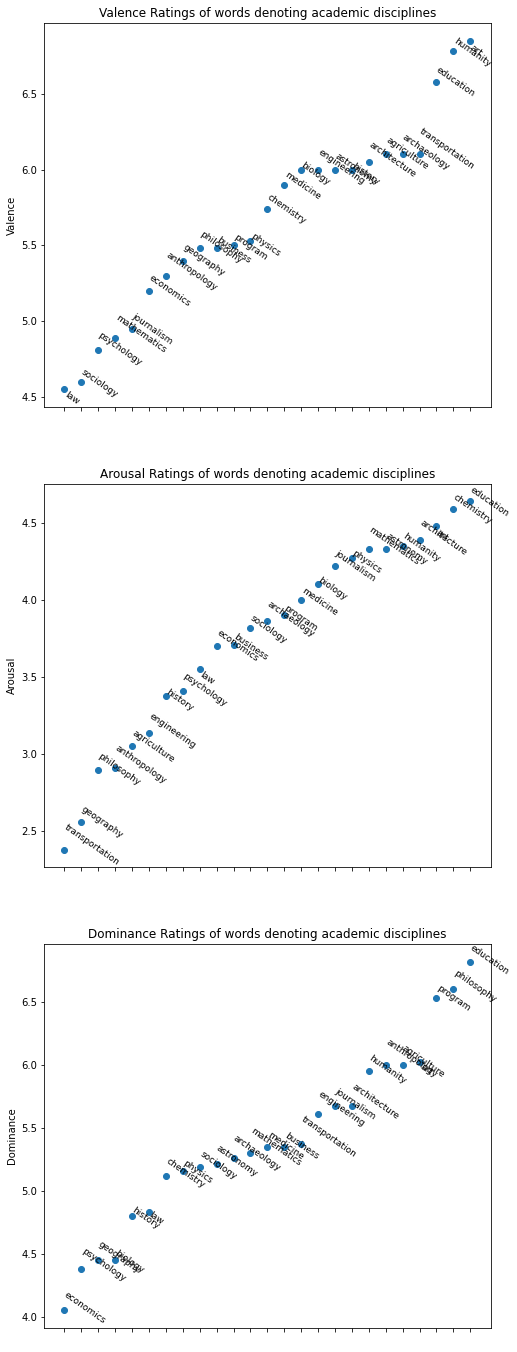

In [134]:
# set figure size and subplot parameters
# add ylabel/title for plots since it is various from each other
plt.figure(figsize=(8,24))

plt.subplot(3,1,1)
visualize('V.Mean.Sum')
plt.ylabel('Valence')
plt.title('Valence Ratings of words denoting academic disciplines')

plt.subplot(3,1,2)
visualize('A.Mean.Sum')
plt.ylabel('Arousal')
plt.title('Arousal Ratings of words denoting academic disciplines')

plt.subplot(3,1,3)
visualize('D.Mean.Sum')
plt.ylabel('Dominance')
plt.title('Dominance Ratings of words denoting academic disciplines')

plt.show()


Overall, "art","humanity","education" make people feel more pleased; on the contrary, "law","sociology","psychology", "mathematics" are rated at a low score in valence level.Besides, people are the least excited towards "transportation","geography","philosophy". However, it is interesting to discover that "philosiphy" is one of the words that most in control for people, and "economics","psychology","geography" are understandable to be the least in control.

However, it is worthy to notice in these three graphs that the range of words in arousal level is at 2.5-4.5,which is much lower than that in valence and dominance level.

### 4. Gender difference with ratings of words denoting academic disciplines

Since it has been showing difference of majors that different gender chosen, I came up an idea to further research people's affective rating of these major related words from prespective of male and female. 

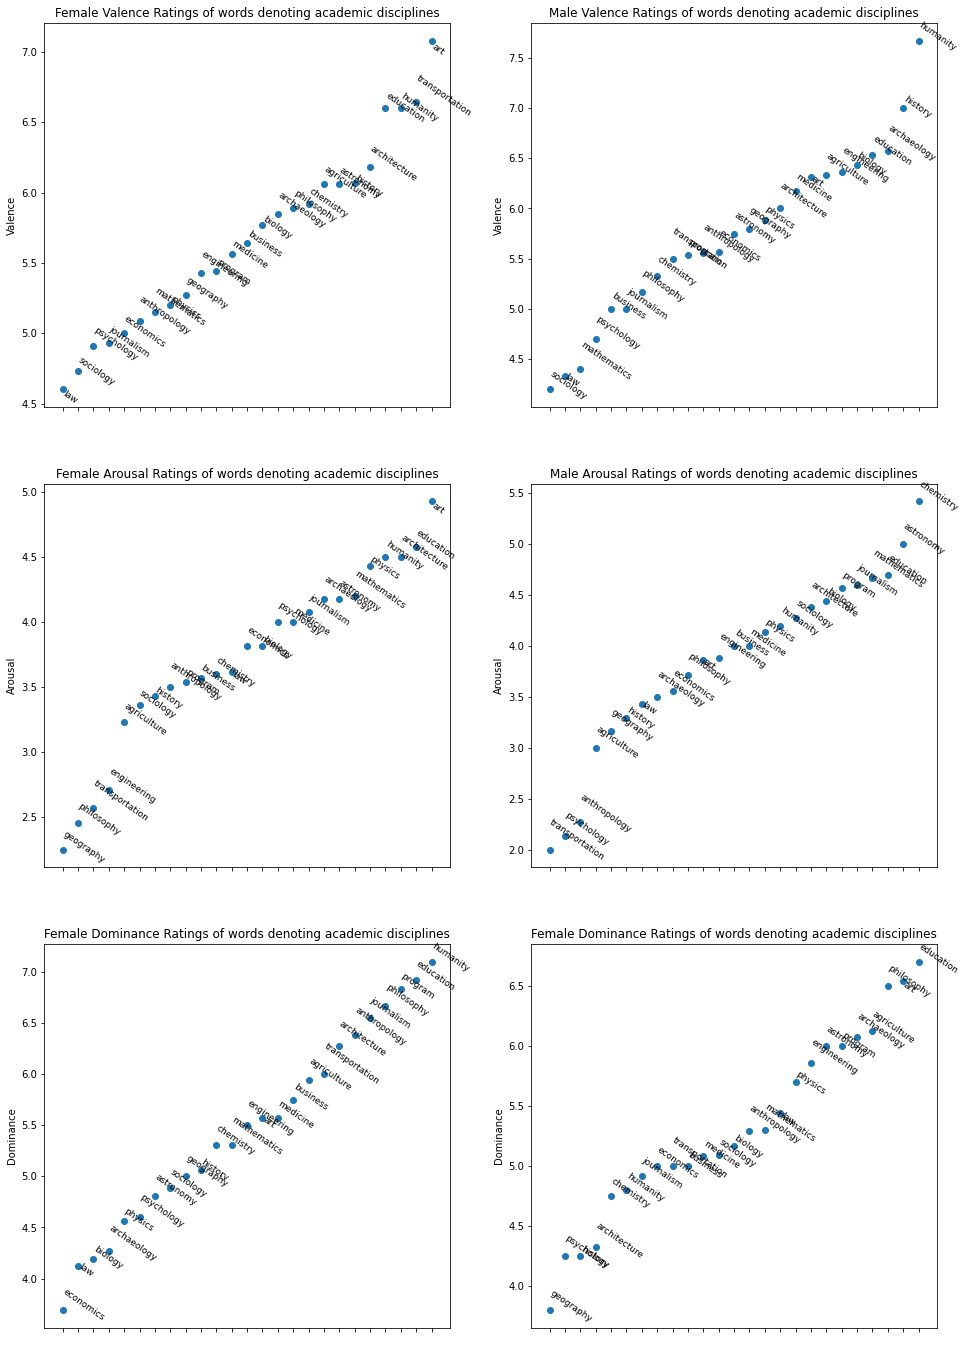

In [136]:
plt.figure(figsize=(16,24))
plt.subplot(3,2,1)
visualize('V.Mean.F')
plt.ylabel('Valence')
plt.title('Female Valence Ratings of words denoting academic disciplines')
        
plt.subplot(3,2,2)
visualize('V.Mean.M')
plt.ylabel('Valence')
plt.title('Male Valence Ratings of words denoting academic disciplines')

plt.subplot(3,2,3)
visualize('A.Mean.F')
plt.ylabel('Arousal')
plt.title('Female Arousal Ratings of words denoting academic disciplines')
        
plt.subplot(3,2,4)
visualize('A.Mean.M')
plt.ylabel('Arousal')
plt.title('Male Arousal Ratings of words denoting academic disciplines')

plt.subplot(3,2,5)
visualize('D.Mean.F')
plt.ylabel('Dominance')
plt.title('Female Dominance Ratings of words denoting academic disciplines')

plt.subplot(3,2,6)
visualize('D.Mean.M')
plt.ylabel('Dominance')
plt.title('Female Dominance Ratings of words denoting academic disciplines')

plt.show()

 
In term of valence, female feel most pleased about art, while male enjoy more about humanity and history. Art, education, architecture make women the most excited, while chemistry astronomy are most exciting for men. In terms of dominace, male and female both regard education and philosophy in control. 

In addition to comparison as a whole, it is also interesting to analyze the differences between female and male in perticular word. For example, female consider journalism more in control than male.

## Analysis of Concreteness database

In [5]:
# load excel file in pandas
df_conc = pd.read_excel(r'.\python project\Concreteness_ratings_Brysbaert_et_al_BRM.xlsx')
df_conc.head()

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.962963,0,0
1,traindriver,0,4.54,0.71,3,29,0.896552,0,0
2,tush,0,4.45,1.01,3,25,0.880000,66,0
3,hairdress,0,3.93,1.28,0,29,1.000000,1,0
4,pharmaceutics,0,3.77,1.41,4,26,0.846154,0,0


### 1. Distribution of concreteness rating

In [139]:
conc_count = df_conc.groupby('Conc.M')['Word'].count()
conc_count = {'Conc.M':conc_count.index,'Word.C':conc_count.values}
df_conc_count = pd.DataFrame(conc_count)
df_conc_count

,Conc.M,Word.C
0,1.04,2
1,1.07,2
2,1.12,1
3,1.14,1
4,1.17,1
...,...,...
363,4.94,9
364,4.95,1
365,4.96,224
366,4.97,119


In [142]:
# compute the sum of words rating in certain ranges
y1 = df_conc_count.loc[(df_conc_count['Conc.M']>1) & (df_conc_count['Conc.M']<=1.5)]['Word.C'].sum()
y2 = df_conc_count.loc[(df_conc_count['Conc.M']>1.5) & (df_conc_count['Conc.M']<=2)]['Word.C'].sum()
y3 = df_conc_count.loc[(df_conc_count['Conc.M']>2) & (df_conc_count['Conc.M']<=2.5)]['Word.C'].sum()
y4 = df_conc_count.loc[(df_conc_count['Conc.M']>2.5) & (df_conc_count['Conc.M']<=3)]['Word.C'].sum()
y5 = df_conc_count.loc[(df_conc_count['Conc.M']>3) & (df_conc_count['Conc.M']<=3.5)]['Word.C'].sum()
y6 = df_conc_count.loc[(df_conc_count['Conc.M']>3.5) & (df_conc_count['Conc.M']<=4)]['Word.C'].sum()
y7 = df_conc_count.loc[(df_conc_count['Conc.M']>4) & (df_conc_count['Conc.M']<=4.5)]['Word.C'].sum() 
y8 = df_conc_count.loc[(df_conc_count['Conc.M']>4.5) & (df_conc_count['Conc.M']<=5)]['Word.C'].sum()

df_distribution_range = pd.DataFrame({
    'Conc.M': ["1-1.5","1.5-2","2-2.5","2.5-3","3-3.5","3.5-4","4-4.5","4.5-5"],
    'Count': [y1, y2, y3, y4, y5, y6 ,y7, y8]
})
# df_distribution_range shows the exact number of words rated between a certain range
df_distribution_range

,Conc.M,Count
0,1-1.5,834
1,1.5-2,7263
2,2-2.5,7578
3,2.5-3,5901
4,3-3.5,4954
5,3.5-4,4410
6,4-4.5,3868
7,4.5-5,5145


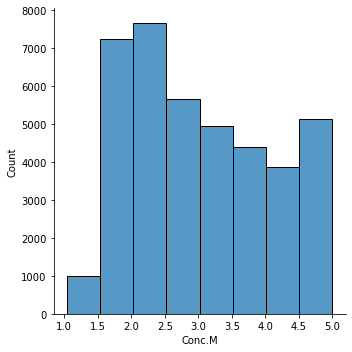

In [144]:
#with sns.displot function, conc.M can be counted automatically
sns.displot(x='Conc.M',bins=8, data=df_conc) 

It shows that the most words rated in 1.5 -2.5 and as word concreteness rating increases from 1.5-2, the number of words decreases.

### 2. Compare the difference of average concreteness rating of bigram and unigram

In [133]:
df_conc.groupby('Bigram')['Conc.M'].mean()

Bigram
0    2.966165
1    3.933315
Name: Conc.M, dtype: float64

<AxesSubplot:xlabel='Bigram'>

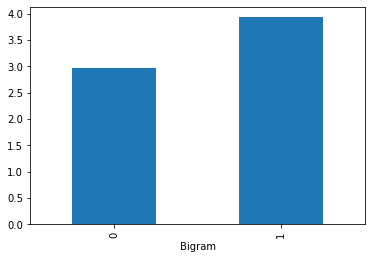

In [158]:
df_conc.groupby('Bigram')['Conc.M'].mean().plot.bar()

Since 0 means unigram and 1 means bigram, the result demonstrates that the average concreteness rating of bigram is higher than that of unigram. This indicates that bigram is more likely to be a concrete word than unigram.

### 3. Compare the concreteness rating difference of "Adjective ","Adverb","Noun","Verb"

Here I am going to recreate a table, including the average rating of "Adjective ","Adverb","Noun","Verb", the number of these four kinds of words, as well as their standard deviation.

In [145]:
dfyy1=df_conc.loc[df_conc["Dom_Pos"].isin(["Adjective","Adverb","Noun","Verb"])]
dfyy1

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
16,sled,0,5.00,0.00,0,28,1.000000,149,Adjective
17,plunger,0,4.96,0.20,0,26,1.000000,48,Adjective
18,human,0,4.93,0.26,0,28,1.000000,6363,Adjective
19,waterbed,0,4.93,0.27,0,27,1.000000,27,Adjective
20,cymbal,0,4.92,0.28,1,25,0.960000,13,Adjective
...,...,...,...,...,...,...,...,...,...
28702,spiriting,0,1.33,0.68,4,31,0.870968,3,Verb
28703,hope,0,1.25,0.59,0,28,1.000000,16352,Verb
28704,zing,0,1.23,0.43,4,26,0.846154,60,Verb
28705,idealize,0,1.19,0.40,0,27,1.000000,6,Verb


In [146]:
# Using groupby and mean function to get average concreteness rating per Dom_Pos
Dom_Conc = df_conc.groupby('Dom_Pos')['Conc.M'].mean()
# Count the number of per Dom_Pos
Dom_Count = df_conc.groupby('Dom_Pos')['Conc.M'].count()
# calculate the standard deviation per Dom_Pos 
Dom_std = df_conc.groupby('Dom_Pos')['Conc.M'].std()

# Convert series to dataframe
dict1 = {'Dom_Pos':Dom_Conc.index,'Conc.M.M':Dom_Conc.values}
df_dict1 = pd.DataFrame(dict1)
dict2 = {'Dom_Pos':Dom_Count.index,'Conc.M.C':Dom_Count.values}
df_dict2 = pd.DataFrame(dict2)
dict3 = {'Dom_Pos':Dom_std.index,'Conc.M.SD':Dom_std.values}
df_dict3 = pd.DataFrame(dict3)

# merge these three dataframe inot one, so that the features can be presented in one table 
df_dict12 = pd.merge(df_dict1,df_dict2, on ='Dom_Pos', how ='inner')
df_dict123 = pd.merge(df_dict12, df_dict3, on ='Dom_Pos', how ='inner')
df_dict123

# filter the result by "Adjective ","Adverb","Noun","Verb"
df_dict123.loc[df_dict123["Dom_Pos"].isin(["Adjective","Adverb","Noun","Verb"])]

,Dom_Pos,Conc.M.M,Conc.M.C,Conc.M.SD
1,Adjective,2.495731,6112,0.719335
2,Adverb,2.064531,1876,0.532668
11,Noun,3.529533,14592,1.016494
17,Verb,2.923375,5369,0.760114


<AxesSubplot:xlabel='Conc.M', ylabel='Dom_Pos'>

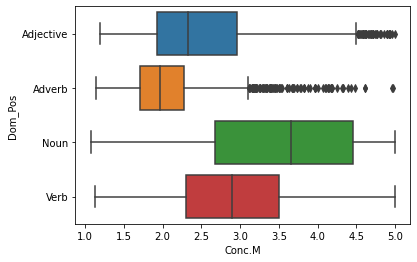

In [147]:
# box plot clearly shows the range of concreteness rating of different word types and their median
sns.boxplot(x='Conc.M', y='Dom_Pos', data=dfyy1)

Threfore, it is shown that the concreteness rating of noun is the highest(3.5), followed by verb(2.9). And adverbs are the most abstract. In addtion, the table presents that the number of nouns is the most in the dataset, but nouns have the largest variability in ratings. 

### 4. Correlation between concreteness rating and its standard deviation

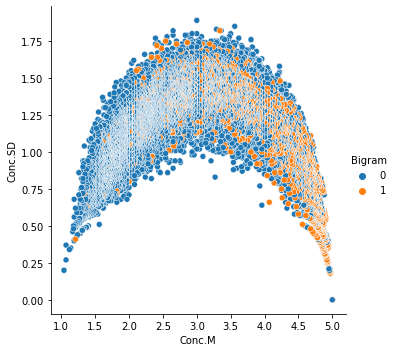

In [200]:
sns.relplot(x='Conc.M', y='Conc.SD', hue='Bigram',data=df_conc)

This graph shows that when a word closes to the lowest level or the highest level of the concreteness rating, it has the smallest variability of rating. While the word reaches the middle range of the concreteness rating, it shows the largest  variability of the rating towards the word. 

### 5. Relation of concreteness and age of acquisition

In [6]:
# find the common words both in dataset"Concreteness_ratings_Brysbaert_et_al_BRM.xlsx" and "AoA_ratings_Kuperman_et_al_BRM.xlsx"
df_AoA = pd.read_excel(r'.\python project\AoA\AoA_ratings_Kuperman_et_al_BRM.xlsx')
df_CA = pd.merge(df_conc,df_AoA, on ='Word', how ='inner')
df_CA.rename(columns = {'Rating.Mean':'AoA.M'},inplace = True)
df_CA

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos,OccurTotal,OccurNum,Freq_pm,AoA.M,Rating.SD,Dunno
0,roadsweeper,0,4.85,0.37,1,27,0.962963,0,0,20,20,NaN,9.834440,4.15,1.000000
1,traindriver,0,4.54,0.71,3,29,0.896552,0,0,20,20,NaN,8.342460,5.01,1.000000
2,tush,0,4.45,1.01,3,25,0.880000,66,0,21,20,1.294118,8.289175,4.94,0.952381
3,hairdress,0,3.93,1.28,0,29,1.000000,1,0,22,21,0.019608,8.864653,2.45,0.954545
4,pharmaceutics,0,3.77,1.41,4,26,0.846154,0,0,22,22,NaN,13.884100,3.80,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,muddleheaded,0,1.54,0.81,4,30,0.866667,0,NaN,19,15,NaN,14.130000,2.95,0.789474
23856,coequality,0,1.48,0.73,4,27,0.851852,0,NaN,20,16,NaN,15.060000,3.49,0.800000
23857,inalienability,0,1.44,0.71,4,29,0.862069,0,NaN,19,16,NaN,14.250000,2.98,0.842105
23858,sinfulness,0,1.43,0.82,0,30,1.000000,0,NaN,22,22,NaN,9.280276,3.64,1.000000


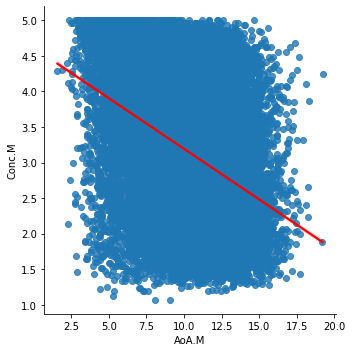

In [152]:
g = sns.lmplot(x='AoA.M', y='Conc.M', data=df_CA, line_kws={'color': 'red'})
plt.show()

In [7]:
df_CA['AoA.M'].corr(df_CA['Conc.M'])

-0.3787301624040076

Holding the hypothesis that people may learn more concrete words when they are in younger ages, I tried to find the correlation between age of aquistion and concreteness. Through the linear regression model, the result is consistent with the previous hypothesis. As growth of ages, the words leant are less concrete, which might be related to people's ability of understanding.

### conclusion

Through the analysis of affective database, I find out that majority of words are relatively happy(the most rating between 5-6), in control(the most rating between 5-6), with the medium intensity of emotion(the most rating around 4). And words' affective rating does have relation with age of acquisition, but it mainly reflects on valence and aroual, which shows decreasing trend as growth of age of acquisition. Then I tried to analyze affective ratings of words denoting academic disciplines. It reveals that "art","humanity","education" make people feel more pleased and people are the least excited towards "transportation","geography","philosophy". Out of surprise, "philosiphy" is one of the words that most in control for people, and "economics","psychology","geography" are understandable to be the least in control. Enhance, gender difference of affective ratings towards these major related words is also analyzed. In general, it shows that female feel most pleased about art,while chemistry astronomy are most exciting for male.

Through the analysis of concreteness database, it demonstrates that as word concreteness rating increases, the number of words decreases. Besides, bigram is more likely to be a concrete word than unigram and noun is the most concrete type of words. According to the result, there is also correlation between age of acquisition and concreteness ratings. With the growth of ages, the words leant are less concrete.